# Pure Python evaluation of vector norms

Generate a list of random floats of a given dimension (dim), and store its result in the variable `vec`.

In [1]:
# This is used for plots and numpy
%pylab inline 

import random
dim = int(1000)

# YOUR CODE HERE
#raise NotImplementedError()
vec=[random.random() for i in range(0,dim)]

Populating the interactive namespace from numpy and matplotlib


In [2]:
from numpy.testing import *

assert_equal(type(vec), list)
assert_equal(len(vec), dim)
for ob in vec:
    assert_equal(type(ob), float)

Write a function that evaluates the $l_p$ norm of a vector in $R^d$. We remind:
$$
\|v \|_{p} := \left(\sum_i (v_i)^p\right)^{1/p}
$$

the function should take as arguments a `list`, containing your $R^d$ vector, and a number `p` in the range $[1, \infty]$, indicating the exponent of the norm. 

**Note:** an infinite float number is given by `float("inf")`.

Throw an assertion (look it up on google!) if the exponent is not in the range you expect.

In [3]:
def p_norm(vector,p):
    # YOUR CODE HERE
    #raise NotImplementedError()
	assert p>=1
	i=0
	result=0;
	if(p==float("inf")):
		while i<len(vector):
			result=max(result,abs(vector[i]))
			i+=1
	else:
		while i<len(vector):
			result+=pow(vector[i],p)
			i+=1
		result=pow(result,1.0/p)
	return result


In [4]:
assert_equal(p_norm(range(10),1), 45.0)
assert_equal(p_norm([3,4], 2), 5.0)

In [5]:
assert_equal(p_norm([-1,-.5,.5], float("inf")), 1)

In [6]:
assert_raises(AssertionError, p_norm, [2,3], 0)
assert_raises(AssertionError, p_norm, [2,3], -1)

# Playing with condition numbers


In this exercise you will have to figure out what are the optimal
values of the stepping interval when approximating derivatives using
the finite difference method. See here_ for a short introduction on
how to run these programs on SISSA machines.

## 1. Finite differences
Write a program to compute the finite difference (`FD`)
approximation of the derivative of a function `f`, computed at
point `x`, using a stepping of size `h`. Recall the definition of
approximate derivative:

$$
FD(f,x,h) := \frac{f(x+h)-f(x)}{h}
$$

In [7]:
def FD(f, x, h):
    # YOUR CODE HERE
    #raise NotImplementedError()
    return (f(x+h)-f(x))/h


In [8]:
assert_equal(FD(lambda x: x, 0, .125), 1.0)

## 2. Compute FD

Evaluate this function for the derivative of `sin(x)` evaluated at `x=1`, for values of `h` equal to `1e-i`, with `i=0,...,20`. Store the values of the finite differences in the list `fd1`.

In [9]:
# YOUR CODE HERE
#raise NotImplementedError()
from math import sin,cos
fd1=[]
x=[pow(10,-i) for i in range(0,21)]
i=0
while i<len(x):
	fd1.append(FD(sin,1,x[i]))
	i+=1


In [10]:
assert_equal(len(fd1), 21)
expected = [0.067826442017785205, 0.49736375253538911, 0.53608598101186899, 0.5398814803603269, 0.54026023141862112, 0.54029809850586474, 0.54030188512133037, 0.54030226404044868, 0.54030229179602429, 0.54030235840940577, 0.54030224738710331, 0.54030113716407868, 0.54034554608506369, 0.53956838996782608, 0.53290705182007514, 0.55511151231257827, 0.0, 0.0, 0.0, 0.0, 0.0]
assert_almost_equal(fd1,expected,decimal=4)

AssertionError: 
Arrays are not almost equal to 4 decimals

(mismatch 4.7619047619%)
 x: array([ 0.0678,  0.4974,  0.5361,  0.5399,  0.5403,  0.5403,  0.5403,
        0.5403,  0.5403,  0.5403,  0.5403,  0.5403,  0.5403,  0.5396,
        0.544 ,  0.5551,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ])
 y: array([ 0.0678,  0.4974,  0.5361,  0.5399,  0.5403,  0.5403,  0.5403,
        0.5403,  0.5403,  0.5403,  0.5403,  0.5403,  0.5403,  0.5396,
        0.5329,  0.5551,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ])

## 3. Error plots

Plot the error, defined as `abs(FD-cos(1.0))` where `FD` is your approximation, in `loglog` format and explain what you see. A good way to emphasize the result is to give the option `'-o'` to the plot command.

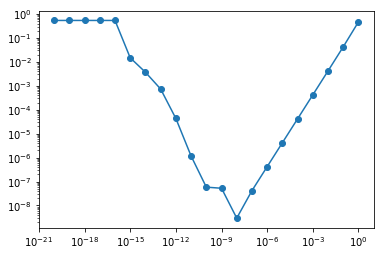

In [11]:
# YOUR CODE HERE
#raise NotImplementedError()
import matplotlib.pyplot as plt
err=[]
val=cos(1.0)
i=0
while i<len(fd1):
	err.append(abs(fd1[i]-val))
	i+=1

_=plt.loglog(x,err,'-o')

Decreasing the stepping value h the error decreases until h=10^-8, then it increases and for h=10^-16, 10^-17, ..., 10^-20 it is also greater than that for h=1: this is because in the FD there is a subtraction of number that are very similar, the difference between the two numbers of the subtraction is too "small" and we loose precision.

## 4. Error plots base 2
Repeate step 2 and 3 above, but using powers of `2` instead of powers of `10`, i.e., using `h` equal to `2**(-i)` for `i=1,...,60`. Do you see differences? How do you explain these differences? Shortly comment.  A good way to emphasize the result is to give the option `'-o'` to the plot command.

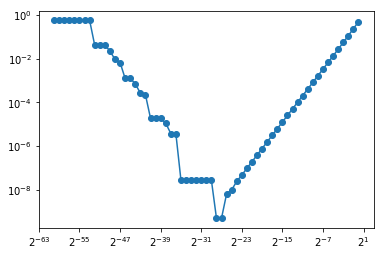

In [12]:
import matplotlib.pyplot as plt
fd1=[]
x=[pow(2,-i) for i in range(0,61)]
i=0
while i<len(x):
	fd1.append(FD(sin,1,x[i]))
	i+=1

err=[]
val=cos(1.0)
i=0
while i<len(fd1):
	err.append(abs(fd1[i]-val))
	i+=1
    
_=plt.loglog(x,err,'-o',basex=2)

Decreasing the stepping value h the error decreases until h=2^-27, decreasing more the stepping value h will increase the error.

## 5. Central Finite Differences
Write a function that computes the central finite difference approximation (`CFD`), defined as 

$$
CFD(f,x,h) := \frac{f(x+h)-f(x-h)}{2h}
$$


In [13]:
def CFD(f, x, h):
    # YOUR CODE HERE
    #raise NotImplementedError()
    return (f(x+h)-f(x-h))/(2*h)

In [14]:
assert_equal(CFD(lambda x: x**2, 0.0, .5), 0.0)
assert_equal(CFD(lambda x: x**2, 1.0, .5), 2.0)

## 6. Error plots for CFD

Repeat steps 2., 3. and 4. and explain what you see. What is the *order* of the approximation 1. and what is the order of the approximation 5.? What's the order of the cancellation errors? 

('Errors with fd are equals or greater than errors with cfd: ', True)


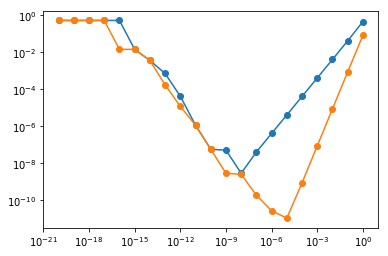

In [15]:
# YOUR CODE HERE
#raise NotImplementedError()
from math import sin,cos
fd1=[]
x=[pow(10,-i) for i in range(0,21)]
errFd=[]
errCfd=[]
val=cos(1.0)
i=0
while i<len(x):
	errCfd.append(abs(CFD(sin,1,x[i])-val))
	errFd.append(abs(FD(sin,1,x[i])-val))
	i+=1

_=plt.loglog(x,errFd,'-o')
_=plt.loglog(x,errCfd,'-o')
r=True
for i in range(len(errFd)):
	r=r and (errFd[i]>=errCfd[i])
print("Errors with fd are equals or greater than errors with cfd: ",r)

('Errors with fd are equals or greater than errors with cfd: ', True)


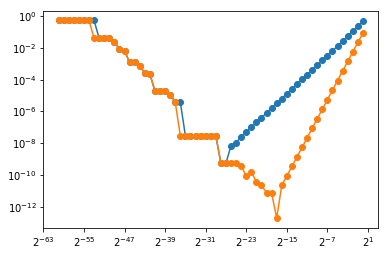

In [16]:
fd1=[]
x=[pow(2,-i) for i in range(0,61)]
errFd=[]
errCfd=[]
val=cos(1.0)
i=0
while i<len(x):
	errCfd.append(abs(CFD(sin,1,x[i])-val))
	errFd.append(abs(FD(sin,1,x[i])-val))
	i+=1

_=plt.loglog(x,errFd,'-o',basex=2)
_=plt.loglog(x,errCfd,'-o',basex=2)
r=True
for i in range(len(errFd)):
	r=r and (errFd[i]>=errCfd[i])
print("Errors with fd are equals or greater than errors with cfd: ",r)

The minimum errors for the approximation with central finite differences are less than the ones with finite differences. Moreover the minimum error when using cfd is obtained using a greater value for the step h.

# Numpy

Numpy provides a very powerful array container. The first line of this ipython notebook has imported all of numpy functionalities in your notebook, just as if you typed::

    from numpy import *
    
Create a numpy array whith entries that range form 0 to 64. Use the correct numpy function to do so. Call it `x`. 

In [17]:
# YOUR CODE HERE
#raise NotImplementedError()
x=arange(0,64)

In [18]:
assert_equal(type(x), ndarray)
assert_equal(len(x), 64)
for i in xrange(64):
    assert_equal(x[i], float(i))

Reshape the one dimensional array, to become a 4 rows 2 dimensional array, let numpy evaluate the correct number of culumns. Call it `y`.

In [19]:
# YOUR CODE HERE
#raise NotImplementedError()
y=reshape(x,((4,-1)))

In [20]:
assert_equal(shape(y), (4,16))

Get the following *slices* of `y`:

* All the rows and the first three colums. Name it `sl1`.
* All the colums and the first three rows. Name it `sl2`.
* Third to sixth (included) columns and all the rows. Name it `sl3`.
* The last three columns and all the rows. Name it `sl4`.

In [21]:
# YOUR CODE HERE
#raise NotImplementedError()
sl1=y[:,0:3]
sl2=y[0:3,:]
sl3=y[:,3:7]
sl4=y[:,-3:]

In [22]:
assert_equal(sl1,[[0,1,2],[16,17,18],[32,33,34],[48,49,50]])
assert_equal(sl2,[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],[32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]])
assert_equal(sl3,[[3,4,5,6],[19,20,21,22],[35,36,37,38],[51,52,53,54]])
assert_equal(sl4,[[13,14,15],[29,30,31],[45,46,47],[61,62,63]])

Now reshape the array, as if you wanted to feed it to a fortran routine. Call it `z`.

In [23]:
# YOUR CODE HERE
#raise NotImplementedError()
z=reshape(x,((4,-1)),'F')

Comment on the result, what has changed with respect to `y`? 

In y the elements are disposed row-wise instead in z the elements are disposed column-wise.

So to iterate all the elements sequentially using y you have y[i][j] with i=0,...,3 and j=0,...,15 with j changing more frequently than i, instead using z i changes more frequently than j.

Set the fourth element of `x` to 666666, and print `x`, `y`, `z`. Comment on the result

In [24]:
# YOUR CODE HERE
#raise NotImplementedError()
x[3]=666666
print(x)
print(y)
print(z)

[     0      1      2 666666      4      5      6      7      8      9
     10     11     12     13     14     15     16     17     18     19
     20     21     22     23     24     25     26     27     28     29
     30     31     32     33     34     35     36     37     38     39
     40     41     42     43     44     45     46     47     48     49
     50     51     52     53     54     55     56     57     58     59
     60     61     62     63]
[[     0      1      2 666666      4      5      6      7      8      9
      10     11     12     13     14     15]
 [    16     17     18     19     20     21     22     23     24     25
      26     27     28     29     30     31]
 [    32     33     34     35     36     37     38     39     40     41
      42     43     44     45     46     47]
 [    48     49     50     51     52     53     54     55     56     57
      58     59     60     61     62     63]]
[[     0      4      8     12     16     20     24     28     32     36
   

Modifying x we also modify y and z that were obtained using numpy.reshape.

## Arrays and Matrices

Define 2 arrays, `A` of dimensions (2,3) and `B` of dimension (3,4).

* Perform the operation `C = A.dot(B)`. Comment the result, or the error you get.

In [25]:
# YOUR CODE HERE
#raise NotImplementedError()
nrowA=2
ncolA=3
nrowB=3
ncolB=4
A=arange(0,nrowA*ncolA)
A=reshape(A,((nrowA,ncolA)))
B=arange(0,nrowB*ncolB)
B=reshape(B,((nrowB,ncolB)))
C=A.dot(B)

In [26]:
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

The result of C = A.dot(B) is that we have saved into the variable C the result of the matrix matrix multiplication of the matrixes saved in variables A and B

* Perform the operation `C = A*(B)`. Comment the result, or the error you get.

In [27]:
C = A*B

ValueError: operands could not be broadcast together with shapes (2,3) (3,4) 

There is an error: the operator * cannot be applied to A and B that are of type numpy.ndarray and have different shapes

 * Convert A and B, from arrays to matrices and perform `A*B`. Comment the result.

In [28]:
# YOUR CODE HERE
#raise NotImplementedError()
A=numpy.asmatrix(A)
B=numpy.asmatrix(B)
C=A*B

In [29]:
assert_equal(type(A),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(B),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(C),numpy.matrixlib.defmatrix.matrix)
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

The operator * can be applied to A and B that are instances of class numpy.matrixlib.defmatrix.matrix and have compatible shapes. In this way we compute the matrix matrix multiplication of the matrixes saved in variables A and B

# Playing with polynomials

The polynomial `(1-x)^6` can be expanded to::
     
     x^6 - 6*x^5 + 15*x^4 - 20*x^3 + 15*x^2 - 6*x + 1

   The two forms above are equivalent from a mathematical point of
   view, but may yield different results in a computer machine.

   Compute and plot the values of this polynomial, using each of the
   two forms, for 101 equally spaced points in the interval
   `[0.995,1.005]`, i.e., with a spacing of 0.0001 (use linspace).
   
   Can you explain this behavior?


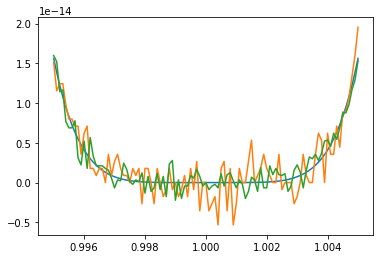

In [30]:
# YOUR CODE HERE
#raise NotImplementedError()
def f1(x):
	return (1-x)**6

def f2(x):
	return x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1

# horner's method
def f3(x):
	coefficients=[1,-6,15,-20,15,-6,1]
	y=coefficients[0]
	for i in range(1,len(coefficients)):
		y=y*x+coefficients[i]
	return y

x=numpy.linspace(0.995,1.005,101)
y1=[f1(i) for i in x]
y2=[f2(i) for i in x]
y3=[f3(i) for i in x]
_=plot(x,y1)
_=plot(x,y2)
_=plot(x,y3)

Computing directly (1-x)^6 we have only one subtraction, instead with the expanded form we have more than one addition and subtraction and we loose precision.

**Playing with interpolation in python**

1. Given a set of $n+1$ points $x_i$ as input (either a list of floats, or a numpy array of floats), construct a function `lagrange_basis(xi,i,x)` that returns the $i$-th Lagrange
polynomial associated to $x_i$, evaluated at $x$. The $i$-th Lagrange polynomial is defined as polynomial of degree $n$ such that $l_i(x_j) = \delta_{ij}$, where $\delta$ is one if $i == j$ and zero otherwise.
   
Recall the mathematical definition of the $l_i(x)$ polynomials:

$$
l_i(x) := \prod_{j=0, j\neq i}^{n} \frac{x-x_j}{x_i-x_j}
$$


In [31]:
# YOUR CODE HERE
#raise NotImplementedError()
def lagrange_basis(xi, i, x):
	assert i>=0 and i<len(xi)
	result=1
	j=0
	while(j<len(xi)):
		if(i!=j):
			result*=(x-xi[j])/(xi[i]-xi[j])
		j+=1
	return result


In [32]:
x = linspace(0,1,5)
d = 3
xi = linspace(0,1,d)

assert_equal(list(lagrange_basis(xi, 0, x)),[1.0, 0.375, -0.0, -0.125, 0.0])
assert_equal(list(lagrange_basis(xi, 1, x)),[0.0, 0.75, 1.0, 0.75, -0.0])
assert_equal(list(lagrange_basis(xi, 2, x)),[-0.0, -0.125, 0.0, 0.375, 1.0])

assert_raises(AssertionError, lagrange_basis, xi, -1, x)
assert_raises(AssertionError, lagrange_basis, xi, 10, x)

Construct the function `lagrange_interpolation(xi,g)` that, given the set of interpolation points `xi` and a function `g`, it returns **another function** that when evaluated at **x** returns the Lagrange interpolation polynomial of `g` defined as 

$$
 \mathcal{L} g(x) := \sum_{i=0}^n g(x_i) l_i(x)
$$

You could use this function as follows::

    Lg = lagrange_interpolation(xi, g)
    xi = linspace(0,1,101)
    plot(x, g(x))
    plot(x, Lg(x))
    plot(xi, g(xi), 'or')

In [33]:
# YOUR CODE HERE
#raise NotImplementedError()
def lagrange_interpolation(xi,f):
	return lambda x: [sum([f(xi[i])*lagrange_basis(xi, i, _x) for i in range(len(xi))]) for _x in x] 


In [34]:
# Check for polynomials. This should be **exact**
g = lambda x: x**3+x**2

xi = linspace(0,1,4)
Lg = lagrange_interpolation(xi, g)

x = linspace(0,1,1001)

assert p_norm(g(x) - Lg(x),float('inf')) < 1e-15, 'This should be zero...'

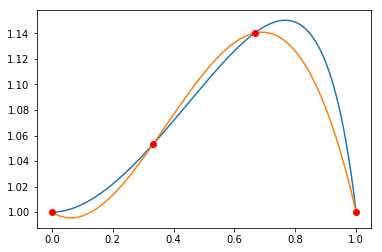

In [35]:
g = lambda x: (1.5-x**3)/(1.5-x**2)
xi = linspace(0,1,4)
Lg = lagrange_interpolation(xi, g)

x = linspace(0,1,1001)

_=plot(x, g(x))
_=plot(x, Lg(x))
_=plot(xi, g(xi), 'or')